In [1]:
import pandas as pd
import sqlite3



In [2]:
df = pd.read_csv("./data/name_basics.tsv",sep='\t')
df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0031983,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0075213,tt0038355,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0083922,tt0069467"


In [3]:
df1= pd.read_csv("./data/title_basics.tsv",sep='\t')
df= pd.read_csv("./data/title_rating.tsv",sep='\t')
df2 = df1.merge(df,how = 'inner',on='tconst')

/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df= pd.read_csv("./data/title_akas.tsv",sep='\t')
df = df.groupby(by="titleId").count()
df.reset_index(inplace=True)
df=df[['titleId','language']]
df= df.rename(columns={'titleId':'tconst'})
df2 = df2.merge(df, how = 'left', on = 'tconst')

/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df= pd.read_csv("./data/title_crew.tsv",sep='\t')
df2 =df2.merge(df,how='left',on='tconst')

In [6]:
df= pd.read_csv("./data/title_episode.tsv",sep='\t')
df2=df2.merge(df,how='left',on='tconst')

In [7]:
#replace NA , \N
df2.parentTconst.fillna("movie",inplace=True)
df2.seasonNumber.fillna(0,inplace=True)
df2.seasonNumber.replace(r"\\N",0,regex=True,inplace=True)
df2.episodeNumber.replace(r"\\N",0,regex=True,inplace=True)
df2.episodeNumber.fillna(0,inplace=True)
df2.writers.replace(r"\\N","unknown",regex=True,inplace=True)
df2.directors.replace(r"\\N","unknown",regex=True,inplace=True)
df2.language.fillna(1,inplace=True)
df2.genres.replace(r"\\N","unknown",regex=True,inplace=True)
df2.runtimeMinutes.replace(r"\\N",0,regex=True,inplace=True)
df2.endYear.replace(r"\\N",0,regex=True,inplace=True)
df2.startYear.replace(r"\\N",0,regex=True,inplace=True)
df2.runtimeMinutes.replace("Game-Show,Reality-TV",0,inplace=True)
df2.runtimeMinutes.replace("Game-Show",0,inplace=True)
df2.runtimeMinutes=pd.to_numeric(df2.runtimeMinutes)
#convert data type
df2.isAdult=pd.to_numeric(df2.isAdult)
df2.startYear=pd.to_numeric(df2.startYear)
df2.endYear=pd.to_numeric(df2.endYear)
df2.seasonNumber=pd.to_numeric(df2.seasonNumber)
df2.episodeNumber=pd.to_numeric(df2.episodeNumber)
df2.to_csv('./data/imdbdata.csv',index=False)
df2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,language,directors,writers,parentTconst,seasonNumber,episodeNumber
0,tt0000001,short,Carmencita,Carmencita,0,1894,0,1,"Documentary,Short",5.7,1915,8.0,nm0005690,unknown,movie,0,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0,5,"Animation,Short",5.8,259,8.0,nm0721526,unknown,movie,0,0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,0,4,"Animation,Comedy,Romance",6.5,1720,9.0,nm0721526,unknown,movie,0,0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,0,12,"Animation,Short",5.6,172,8.0,nm0721526,unknown,movie,0,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,0,1,"Comedy,Short",6.2,2537,12.0,nm0005690,unknown,movie,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261829,tt9916690,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,0,10,"Adventure,Animation,Comedy",6.5,6,1.0,nm0996406,"nm1482639,nm2586970",tt0985991,3,47
1261830,tt9916720,short,The Nun 2,The Nun 2,0,2019,0,10,"Comedy,Horror,Mystery",5.3,265,14.0,nm10538600,unknown,movie,0,0
1261831,tt9916730,movie,6 Gunn,6 Gunn,0,2017,0,116,unknown,8.4,6,1.0,nm10538612,nm10538612,movie,0,0
1261832,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,0,43,"Family,Game-Show,Reality-TV",6.8,21,7.0,unknown,unknown,tt1442550,10,15


In [8]:
#consolidate the movie data files
# import os

# directory = os.fsencode('./themoviedb')
# count = 0
    
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
     
#     file = (f'./themoviedb/{filename}')
#     if count==0:
#         df = pd.read_csv(file)
#         count+=1
#     else:
#         df1 =pd.read_csv(file)
#         df = pd.concat([df,df1],ignore_index=True)
        
# df4 = pd.read_csv('./Julia/themoviedb_id_500000_to_600000.csv',
#                  lineterminator='\n')
# df = pd.concat([df,df4],ignore_index=True)
# df.to_csv('./data/themoviedb.csv', index=False)

In [9]:
#consolidate omdb data files
# import os

# directory = os.fsencode('./omdb')
# count = 0
    
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
     
#     file = (f'./omdb/{filename}')
#     if count==0:
#         df = pd.read_csv(file)
#         count+=1
#     else:
#         df1 =pd.read_csv(file)
#         df = pd.concat([df,df1],ignore_index=True)
# df.to_csv('./data/omdb.csv', index=False)

In [15]:
#read and merge 3 data sources
df2 = pd.read_csv('./data/imdbdata.csv')
df = pd.read_csv('./data/themoviedb.csv')
df.rename(columns={'imdb_id':'tconst'},inplace=True)
df2= df2.merge(df,how='inner',on='tconst')
df2=df2.loc[df2.startYear>=2017,:]
df2=df2.loc[df2.titleType=='movie',:]
# df2.to_csv('./data/subset_movie_data_new.csv',index=False)
df = pd.read_csv('./data/omdb.csv')
df2= df2.merge(df,how='inner',on='tconst')

In [16]:
#export to raw data
df2.to_csv('./data/raw_consolidate_data.csv',index=False)


In [21]:
#clean up raw data
df2 =pd.read_csv('./data/raw_consolidate_data.csv',lineterminator='\n')
# remove columns
df2=df2.drop(['titleType','originalTitle','endYear','directors','writers','seasonNumber',
              'episodeNumber','parentTconst','themoviedb_id','status','Director', 'Writer',
              'overview','Plot','DVD','production_companies_id','numVotes','rating1source',
       'rating1value', 'rating2source', 'rating2value', 'rating3source',
       'rating3value','Metascore','popularity','original_language','production_companies_name','production_countries',
       'Awards','BoxOffice','revenue','vote_average','vote_count'],axis=1)
#filter out aldult movies
df2 =df2.loc[(df2.isAdult==0) ,:]
df2['language']=df2['language'].astype(int)
df2.belongs_to_collection.fillna(0,inplace=True)
#conver flag if movie is in collection
df2['is_in_collection'] = df2.apply(lambda x: 0 if x.belongs_to_collection==0 else 1, axis=1)
#take month of release
x=df2.Released.str.split(' ',expand=True)
df2['release_month'] = x.iloc[:,1]
df2['release_month'] =  pd.to_datetime(df2['release_month'], format='%b')
df2['release_month'] = df2.apply(lambda x: x.release_month.month , axis=1)
df2.release_month.fillna(0,inplace=True)
df2['release_month']=df2['release_month'].astype(int)
df2.rename(columns={'language':'number_of_languages'},inplace=True)
#count number of popular actors/actress
df2.Actors = df2.Actors.str.lower()
x = df2.Actors.str.split(', ',expand=True).rename(columns={0:'A', 1:'B',2:'C',3:'D'})
popular = pd.read_csv('./data/popular_actor_actress.csv')
popular.names = popular.names.str.lower()
popular_names = popular.names.to_list()
x['popular1'] = x.apply(lambda y: 1 if y.A in popular_names else 0, axis=1)
x['popular2'] = x.apply(lambda y: 1 if y.B in popular_names else 0, axis=1)
x['popular3'] = x.apply(lambda y: 1 if y.C in popular_names else 0, axis=1)
x['popular4'] = x.apply(lambda y: 1 if y.D in popular_names else 0, axis=1)
x['popular']= x.popular1 + x.popular2 + x.popular3 + x.popular4
df2['popular_actors_count'] = x.iloc[:,8]

#encode rated columns
df2.Rated.fillna('unknown',inplace=True)
df2.replace({'Rated':{'TV-MA':'MA',
                      'TV-PG':'PG',
                      'Not Rated':'Unrated',
                      'TV-G':'G',
                      'APPROVED':'Approved',
                      'TV-13':'PG-13',
                      '0':'unknown',
                      'Open':'Unrated',
                      'MA-17':'MA',
                      'MA-13':'MA',
                      'M':'MA',
                      'TV-Y':'del','E10+':'del','NC-17':'del','12':'del','M/PG':'del','18':'del','X':'del','TV-Y7-FV':'del'
                      }},inplace=True)
df2 = df2.loc[(df2.Rated!='del'),:]
rate = df2.Rated.unique().tolist()
rate_counts=[]
for i in rate:
    df2[f'rated_{i}'] = df2.apply(lambda y: 1 if (y.Rated==f'{i}') else 0, axis=1)
    rate_counts.append(df2[f'rated_{i}'].sum())
#encode genre columns
x = df2.genres.str.split(',',expand=True).rename(columns={0:'A', 1:'B',2:'C'})
genre1 = x.A.unique().tolist()
genre2 = x.B.unique().tolist()
genre3 = x.C.unique().tolist()
genre = genre1 + genre2 + genre3
genre = list(set(genre))
genre_counts = []
for i in genre:
    x[f'{i}'] = x.apply(lambda y: 1 if (y.A==f'{i}') or (y.B==f'{i}') or (y.C==f'{i}') else 0, axis=1)
    df2[f'genre_{i}'] = x[f'{i}']
    genre_counts.append(df2[f'genre_{i}'].sum())

df2=df2.drop(['belongs_to_collection','Released','isAdult','Actors','genres','Rated'],axis=1)

df2.columns


Index(['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes',
       'averageRating', 'number_of_languages', 'budget', 'is_in_collection',
       'release_month', 'popular_actors_count', 'rated_unknown', 'rated_R',
       'rated_MA', 'rated_Unrated', 'rated_PG', 'rated_TV-14', 'rated_PG-13',
       'rated_G', 'rated_Approved', 'rated_TV-Y7', 'genre_None',
       'genre_History', 'genre_Adventure', 'genre_Music', 'genre_Fantasy',
       'genre_Comedy', 'genre_Thriller', 'genre_Documentary',
       'genre_Biography', 'genre_Sport', 'genre_Musical', 'genre_Action',
       'genre_War', 'genre_Short', 'genre_unknown', 'genre_Family',
       'genre_Talk-Show', 'genre_Romance', 'genre_Mystery', 'genre_Reality-TV',
       'genre_Crime', 'genre_Animation', 'genre_Sci-Fi', 'genre_Horror',
       'genre_Western', 'genre_News', 'genre_Game-Show', 'genre_Adult',
       'genre_Drama'],
      dtype='object')

In [25]:
# %pip install seaborn

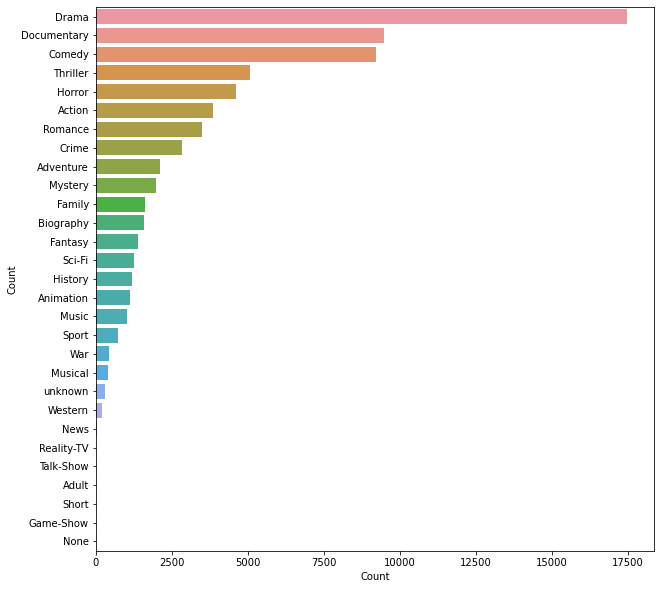

In [24]:
#plot highest to lowest by genre
all_genres = dict(zip(genre, genre_counts))
all_genres_df = pd.DataFrame({'Genre': genre, 'Count': genre_counts})
all_genres_df.fillna('None',inplace=True)
import matplotlib.pyplot as plt 
import seaborn as sns

g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()




In [26]:
#clean up genre columns
remove_columns_genre = all_genres_df.loc[(all_genres_df.Count<=1624) & (all_genres_df.Genre!='unknown'),: ].Genre.unique()
for i in range(0,len(remove_columns_genre)):
    remove_columns_genre[i]= 'genre_'+ remove_columns_genre[i]
df2.drop(remove_columns_genre,axis=1,inplace=True)   


In [27]:
#move average rating to the end of the dataframe
df2['AverageRating']=df2.averageRating
df2.drop(columns=['averageRating'],inplace=True)

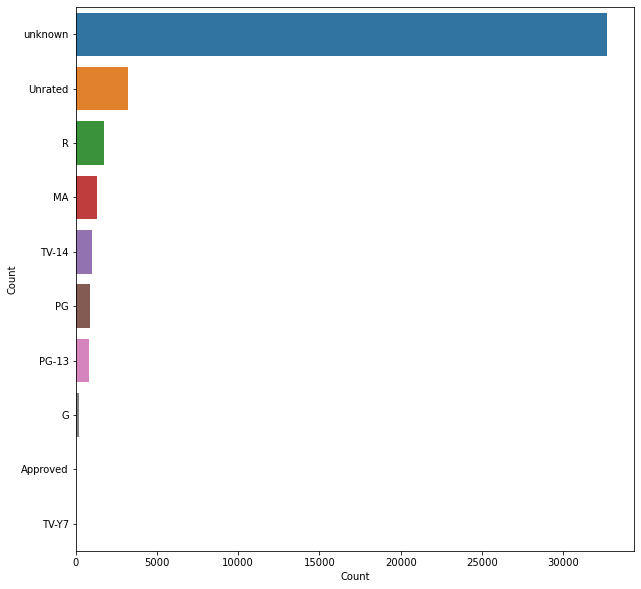

In [28]:
#plot highest to lowest by rated
all_rated = dict(zip(rate, rate_counts))
all_rated_counts = pd.DataFrame({'Rated': rate, 'Count': rate_counts})

# all_rated_counts.fillna('None',inplace=True)

r = all_rated_counts.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=r, x= "Count", y = "Rated")
ax.set(ylabel = 'Count')
plt.show()


In [29]:
#clean up rated columns, and create rating bins
df2.drop(['rated_Approved','rated_TV-Y7'],axis=1,inplace=True)
df2['budget']=df2['budget'].astype(int)
df2['rating_bins'] = pd.cut(df2.AverageRating, [0, 2, 4, 6, 8, 10], labels=['E','D','C','B','A'],  right=False)
df2.to_csv('./data/clean_raw_data.csv',index=False)

In [30]:
#machine learning
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('./data/clean_raw_data.csv')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,tconst,primaryTitle,startYear,runtimeMinutes,number_of_languages,budget,is_in_collection,release_month,popular_actors_count,rated_unknown,...,genre_Documentary,genre_Action,genre_unknown,genre_Romance,genre_Mystery,genre_Crime,genre_Horror,genre_Drama,AverageRating,rating_bins
0,tt0013274,Istoriya grazhdanskoy voyny,2021,133,7,0,0,5,0,1,...,1,0,0,0,0,0,0,0,6.4,B
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020,70,10,0,0,9,0,1,...,0,0,0,0,0,0,0,1,6.4,B
2,tt0069049,The Other Side of the Wind,2018,122,22,12000000,0,11,0,0,...,0,0,0,0,0,0,0,1,6.7,B
3,tt0083060,The Drive to Win,2019,0,3,0,0,4,0,1,...,0,0,0,0,0,0,0,1,6.6,B
4,tt0100275,The Wandering Soap Opera,2017,80,8,0,0,5,0,1,...,0,0,0,0,0,0,0,1,6.4,B


In [32]:
selected_features = df.iloc[:,2:28].values

In [33]:
y = df.iloc[:,29].values.reshape(-1,1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=2,test_size=.7)

In [35]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300,max_features = 'sqrt',min_samples_leaf=2)
rf = rf.fit(X_train_scaled, y_train)


/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.7980166600555335
Testing Data Score: 0.5703406541102877


In [38]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
search_space = {
    'n_estimators': [50,150,300],
    'max_features':['sqrt',0.8,0.2],
    'min_samples_leaf' : [1,2]
    
}

In [42]:
# Train the model with GridSearch
# grid = GridSearchCV(rf, search_space, verbose=3)

In [43]:
# grid.fit(X_train_scaled, y_train)

In [44]:
# print(grid.best_params_)
# print(grid.best_score_)

In [45]:
import joblib
joblib.dump(rf, "./random_forest.joblib")

['./random_forest.joblib']